In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
%matplotlib inline
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [2]:
heart_csv=pd.read_csv('heart303.csv')
heart_csv.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [3]:
duplicated=heart_csv.duplicated().sum()
if duplicated:
    print('Duplicated rows in dataset are : {}'.format(duplicated))
else:
        print('no values duplicated in dataset')

Duplicated rows in dataset are : 1


In [4]:
heart_csv = heart_csv.drop_duplicates()

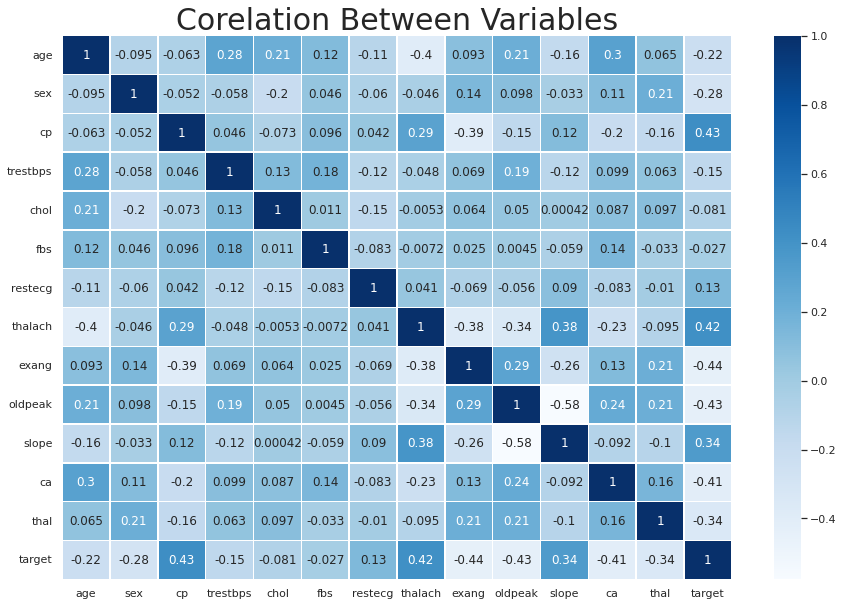

In [5]:
sns.set(style="white") 

plt.rcParams['figure.figsize'] = (15, 10) 

sns.heatmap(heart_csv.corr(), annot = True, linewidths=.5, cmap="Blues")

plt.title('Corelation Between Variables', fontsize = 30)

plt.show()

In [6]:
y = heart_csv['target']

X = heart_csv.drop(['target'], axis = 1)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [10]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.2193946 , 0.1134155 , 0.09916294, 0.09149624, 0.07885324,
       0.0744958 , 0.06762814, 0.05785703, 0.05060782, 0.04470671,
       0.04191984, 0.03144388, 0.02901826])

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [12]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2)
classifier.fit(X_train, y_train)

# Predicting the Test set results
pred_train = classifier.predict(X_train)

score_train = accuracy_score(y_train,pred_train)

print('Accuracy:{0:f}'.format(score_train))

Accuracy:0.863071


In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
pred_test = classifier.predict(X_test)

score_test =accuracy_score(y_test,pred_test)
cm = confusion_matrix(y_test, pred_test)
print(cm)
print(accuracy_score(y_test, pred_test))

[[23  5]
 [ 4 29]]
0.8524590163934426
